In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import smtplib

In [2]:
from datetime import datetime
from email.message import EmailMessage
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
time_series = pd.read_csv("/home/dba/python_dev/real_python/cows168.csv")

In [4]:
time_series.describe()

,MProd
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [5]:
time_series.head(10)


,Month,MProd
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
5,1962-06,697
6,1962-07,640
7,1962-08,599
8,1962-09,568
9,1962-10,577


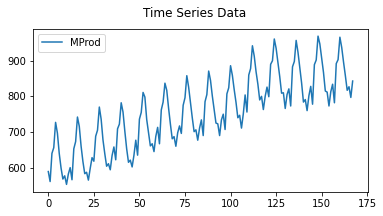

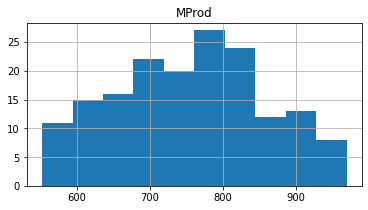

In [6]:
# Line plots of time series
fig, ax = plt.subplots(figsize=(6,3))
fig.suptitle('Time Series Data')
time_series.plot(ax=ax)
plt.show()

#Historgram
fig, ax = plt.subplots(figsize=(6,3))
#fig.suptitle('Histogram')
time_series.hist(ax=ax)
plt.show()

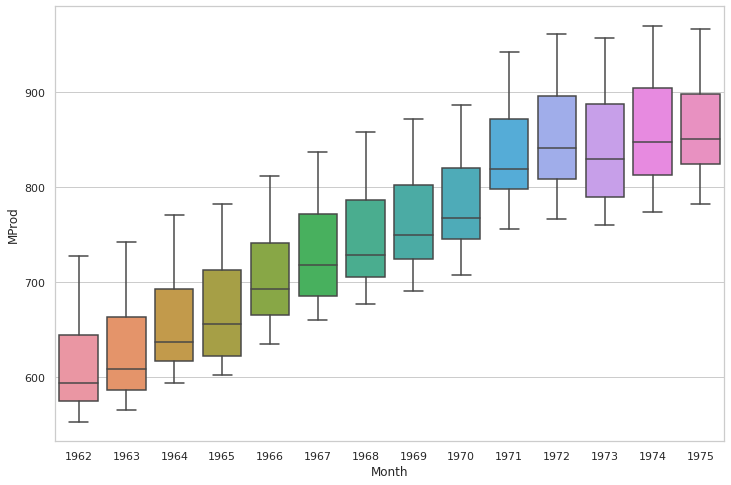

In [7]:
time_series['Month']=time_series['Month'].str[:4]
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.boxplot(x=time_series.Month, y=time_series.MProd);

                      

In [8]:
time_series=time_series.set_index('Month')
time_series.index

Index(['1962', '1962', '1962', '1962', '1962', '1962', '1962', '1962', '1962',
       '1962',
       ...
       '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975',
       '1975'],
      dtype='object', name='Month', length=168)

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomp = sm.tsa.seasonal_decompose(time_series,freq= 12)
decomp.plot()
plt.show()

NameError: name 'sm' is not defined

In [ ]:
time_series['year'] = time_series.index.year
time_series['month'] = time_series.index.month
df_pivot = pd.pivot_table(time_series, values='Production', index='month', columns='year', aggfunc='mean')
df_pivot.plot(figsize=(12,8))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.show()

